In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path

In [2]:
path = Path("/home/eimantas/Desktop/HACKHATON/TASK1/images")

items = DataBlock(
    blocks     = (ImageBlock, CategoryBlock),
    get_items  = get_image_files,
    splitter   = RandomSplitter(valid_pct=0.2, seed=24),
    get_y      = parent_label,
    item_tfms  = Resize(256)
)

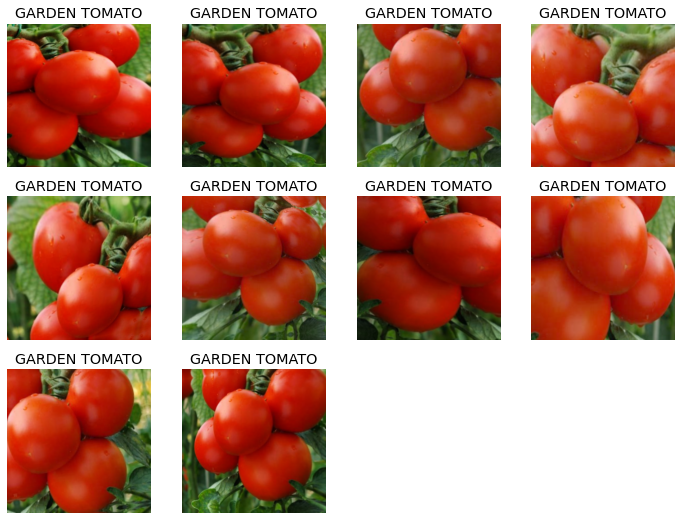

In [3]:
items = items.new(
    item_tfms=RandomResizedCrop(256, min_scale=0.3),
    batch_tfms=aug_transforms(mult=1))

dls = items.dataloaders(path, bs=32) # (bs default is 64 but using 32 to prevent memory errors)
dls.train.show_batch(unique=True, max_n=10)

In [4]:
torch.cuda.empty_cache()
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,5.653001,4.611309,0.819920,02:32


SuggestedLRs(valley=0.0006918309954926372)

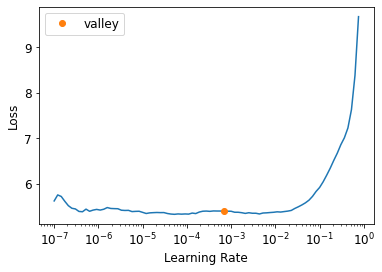

In [5]:
learn.lr_find()

In [6]:
learn.fit_one_cycle(9, lr_max=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,5.154499,4.256895,0.793834,02:38
1,4.687768,3.973677,0.784645,02:38
2,4.388517,3.697328,0.740181,02:34
3,4.092929,3.457356,0.703424,02:36
4,3.762373,3.234375,0.655402,02:37
5,3.510212,3.026704,0.622647,02:31
6,3.196838,2.873801,0.589595,02:31
7,2.798130,2.801938,0.578924,02:31
8,2.661558,2.794343,0.573736,02:31


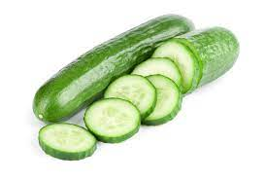

In [10]:
img = PILImage.create("/home/eimantas/Desktop/HACKHATON/TASK1/cucumber.jpeg")
img.to_thumb(265)

In [11]:
learn.predict(img)

('CUCUMBER',
 TensorBase(281),
 TensorBase([1.3429e-08, 6.1968e-08, 1.4025e-06,  ..., 9.3588e-06, 1.4739e-08, 1.3571e-08]))

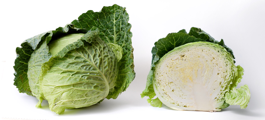

In [13]:
img = PILImage.create("/home/eimantas/Desktop/HACKHATON/TASK1/cabbage.jpg")
img.to_thumb(265)

In [14]:
learn.predict(img)

('SAVOY CABBAGE',
 TensorBase(827),
 TensorBase([6.4608e-06, 6.6944e-08, 4.0005e-07,  ..., 5.3374e-07, 4.9752e-08, 3.2948e-08]))

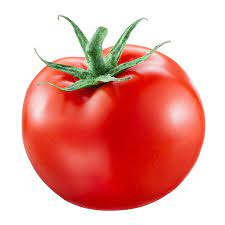

In [17]:
img = PILImage.create("/home/eimantas/Desktop/HACKHATON/TASK1/tomato.jpeg")
img.to_thumb(265)

In [18]:
learn.predict(img)

('TOMATO',
 TensorBase(954),
 TensorBase([9.8722e-07, 2.2835e-05, 1.9155e-03,  ..., 5.2379e-07, 1.3645e-05, 7.4263e-06]))

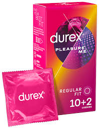

In [25]:
img = PILImage.create("/home/eimantas/Desktop/HACKHATON/TASK1/condom.jpeg")
img.to_thumb(128)

In [26]:
learn.predict(img)

('CONDOMS',
 TensorBase(255),
 TensorBase([1.6088e-05, 8.3649e-04, 1.5654e-04,  ..., 3.0964e-06, 1.1648e-04, 2.0443e-04]))

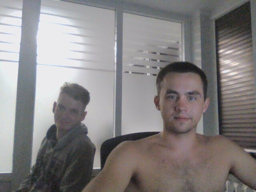

In [27]:
img = PILImage.create("/home/eimantas/Desktop/HACKHATON/TASK1/team.jpg")
img.to_thumb(256)

In [28]:
learn.predict(img)  # go check images/NANCE 

('NANCE',
 TensorBase(603),
 TensorBase([1.0062e-04, 1.8556e-04, 2.8769e-05,  ..., 5.6085e-05, 4.9713e-05, 3.7539e-05]))